# Data Augmentation

why? 많은 양의 데이터는 과적합을 방지해 모델이 실제 테스트 환경에서 더 잘 동작할 할 수 있도록 도와준다.

## 1. tf - augmentation

데이터 불러오기

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

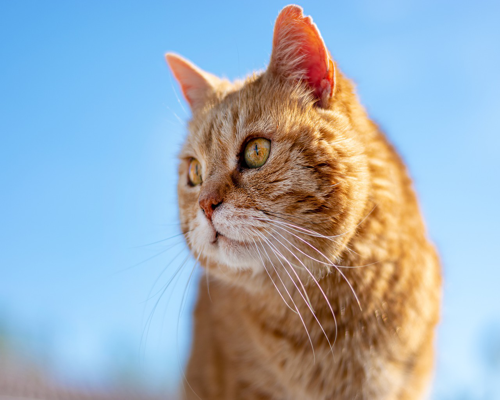

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

#### flip

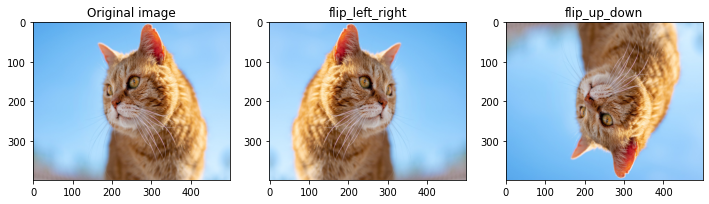

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

#### random flip

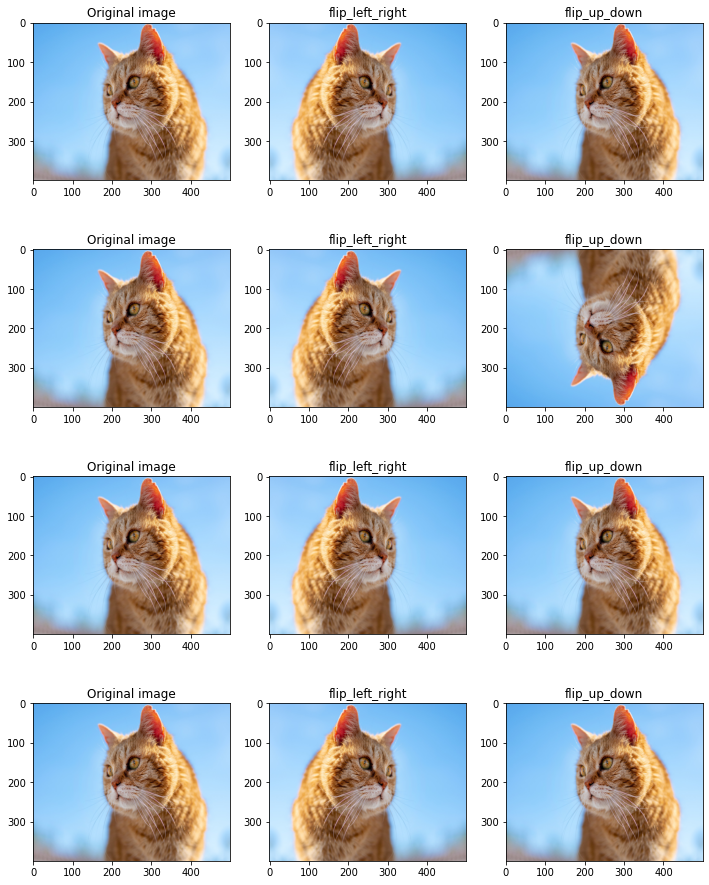

In [5]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

#### center crop

central fractions 조절 중요

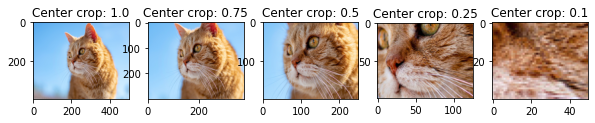

In [6]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

#### random center crop

tf에 구현돼있지 않음

In [7]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

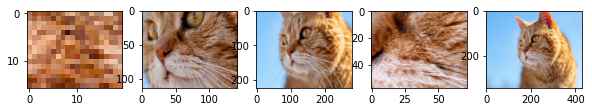

In [15]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

#### random crop

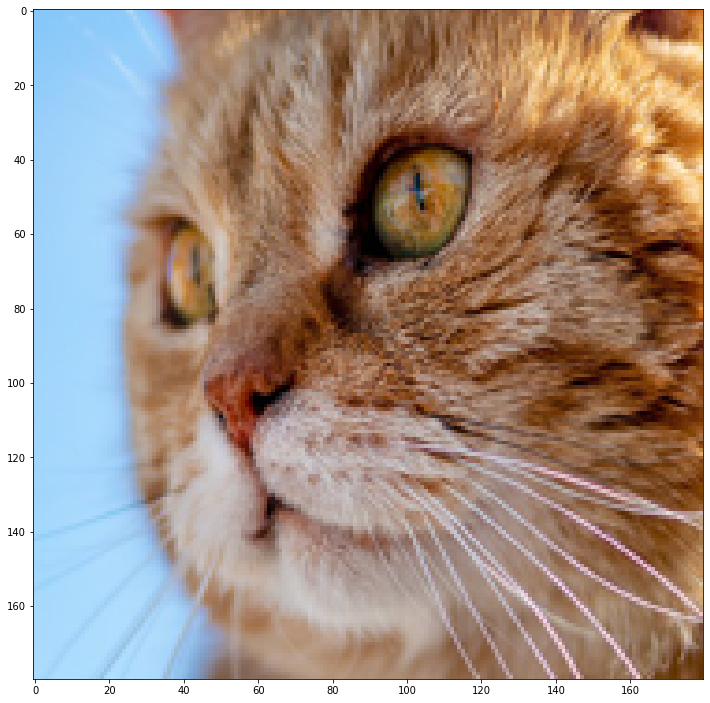

In [16]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

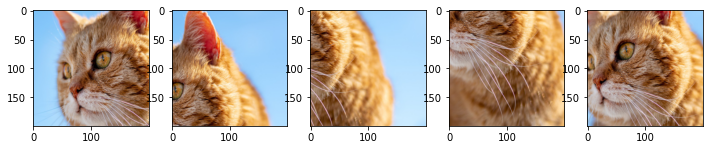

In [17]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

#### random brightness

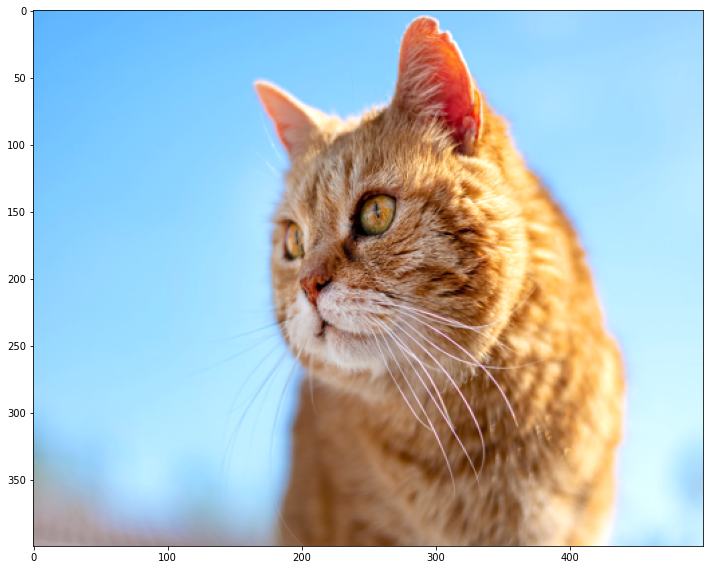

In [18]:
# apply random_brightness on cat image
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

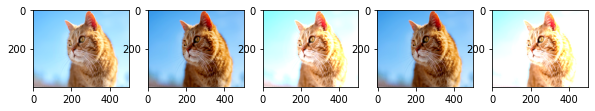

In [19]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

___

## 2. imgaug

augmentation 전문 라이브러리

#### Image 대신 numpy가 기본형

In [20]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

#### affine

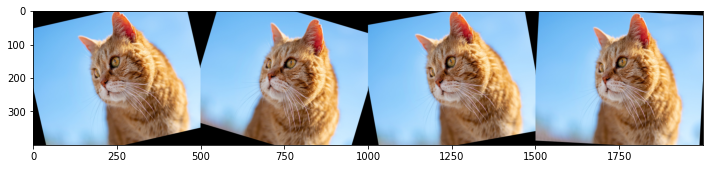

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### crop

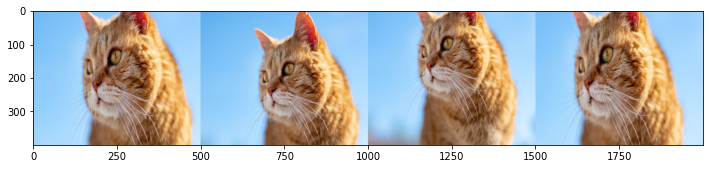

In [22]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### sequential : 여러 augment 동시에

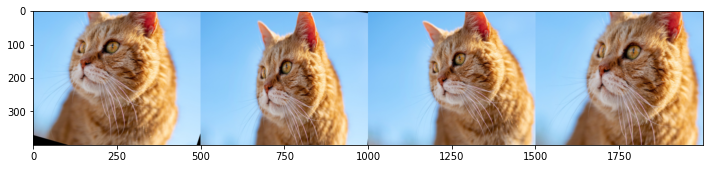

In [23]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### sequential + random

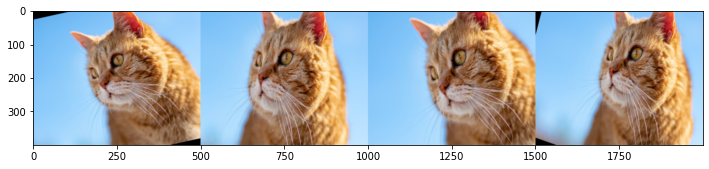

In [24]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### gray_scale + saturation

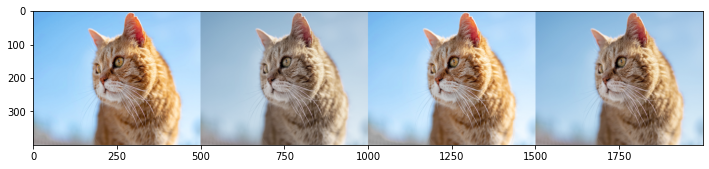

In [25]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### sometimes : 확률 지정해주기

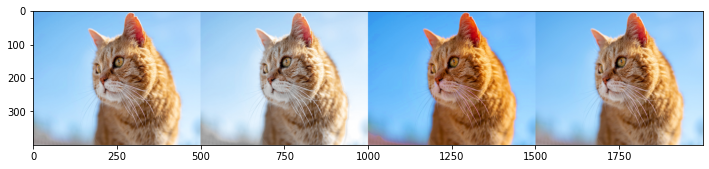

In [26]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### sequential + sometimes

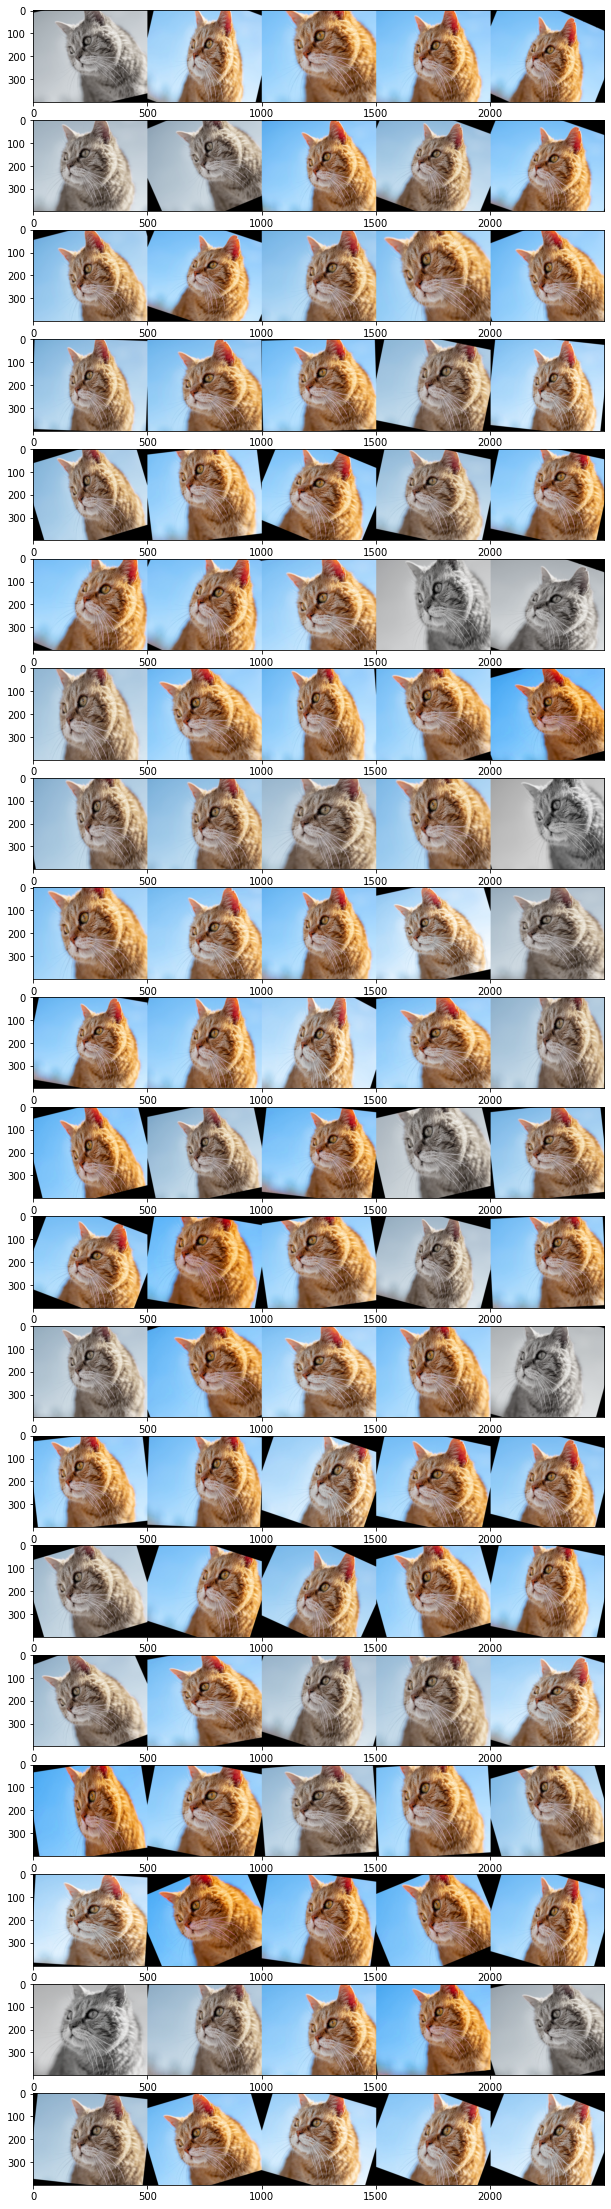

In [27]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()

## 3. GAN based

#### [The Effectiveness of Data Augmentation in Image Classification using Deep Learning](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf)

- Style Transfer 활용

![image](https://user-images.githubusercontent.com/86637320/134955254-e5a6f3c7-499c-4d8a-89dd-82091a51bc6d.png)
